In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('employee_data.csv')


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_copy = data
data_copy = pd.get_dummies(data, columns=["job_role", "work_location"], dtype=int)
data_copy

,unit_id,manager_id,name,phone_number,salary,job_role_Employee,job_role_HR,job_role_Manager,"work_location_Atlanta, GA","work_location_Austin, TX",...,"work_location_Hartford, CT","work_location_Los Angeles, CA","work_location_Manhattan, NY","work_location_New Haven, CT","work_location_Newington, CT","work_location_Norwalk, CT","work_location_Queens, NY","work_location_South Windsor, CT","work_location_St Paul, MN","work_location_West Hartford, CT"
0,1,1,Elaine Ramos,+1 505-611-2383,173960.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,1,Rylie Donovan,+1 472-214-0466,187065.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,1,Kabir Neal,+1 505-646-1359,177601.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1,Isaac Spears,+1 472-271-7668,164607.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,Eileen Weiss,+1 472-224-1904,206958.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,33,Gerald York,+1 215-268-6599,73397.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
996,997,33,Karter Moody,+1 505-471-4835,53449.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
997,998,33,Theodora Tanner,+1 341-978-3597,55125.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
998,999,33,Luis Joseph,+1 505-646-6983,85863.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
job_role = data_copy.loc[:, data_copy.columns.str.startswith('job_role')]
job_role
work_location = data_copy.loc[:, data_copy.columns.str.startswith('work_location')]
work_location
work_location.reset_index(drop=True, inplace=True)
job_role.reset_index(drop=True, inplace=True)

new_data = pd.concat([work_location, job_role], axis=1)

new_data

,"work_location_Atlanta, GA","work_location_Austin, TX","work_location_Bronx, NY","work_location_Brooklyn, NY","work_location_Chicago, IL","work_location_Hartford, CT","work_location_Los Angeles, CA","work_location_Manhattan, NY","work_location_New Haven, CT","work_location_Newington, CT","work_location_Norwalk, CT","work_location_Queens, NY","work_location_South Windsor, CT","work_location_St Paul, MN","work_location_West Hartford, CT",job_role_Employee,job_role_HR,job_role_Manager
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
996,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
997,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


In [16]:
X = new_data
y = data_copy['salary']



In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(700, 18) (300, 18) (700,) (300,)


In [18]:

model = LinearRegression()
model.fit(X_train, y_train)

c = model.intercept_
m = model.coef_
m



array([-4.12938807e+17, -4.12938807e+17, -4.12938807e+17, -4.12938807e+17,
       -4.12938807e+17, -4.12938807e+17, -4.12938807e+17, -4.12938807e+17,
       -4.12938807e+17, -4.12938807e+17, -4.12938807e+17, -4.12938807e+17,
       -4.12938807e+17, -4.12938807e+17, -4.12938807e+17, -1.03329145e+18,
       -1.03329145e+18, -1.03329145e+18])

In [19]:
y_predict = model.predict(X_train)
y_predict

array([ 69120., 110592.,  69632.,  66304.,  69632.,  66304.,  64256.,
       106240.,  66304.,  66304., 106752.,  69632., 106752.,  68352.,
       102656.,  69376.,  66304.,  65536., 102656.,  70400.,  68352.,
        66304.,  64512., 106240.,  69632.,  64512., 102656.,  64256.,
        64256.,  64256.,  69632.,  64512.,  64512.,  68352., 231680.,
       106240., 106240.,  70400.,  64256.,  69376.,  66304., 102656.,
       102656.,  64512.,  64512.,  68352.,  69632., 106752.,  64512.,
       106240., 102656., 106752.,  69120., 106752.,  68352., 102656.,
       102656.,  66304.,  66304.,  64512., 110592.,  65536.,  69632.,
       110592.,  69120., 316928.,  68352., 110592.,  66304.,  66304.,
       106240.,  68352.,  70400., 106752., 276224.,  68352.,  69376.,
       106752., 106240.,  70400.,  66304., 110592., 102656.,  64512.,
        69376., 106240., 110592.,  70400., 106752.,  70400.,  69632.,
       357632.,  66304.,  64768.,  64768., 358144.,  69632., 102656.,
        66304.,  704

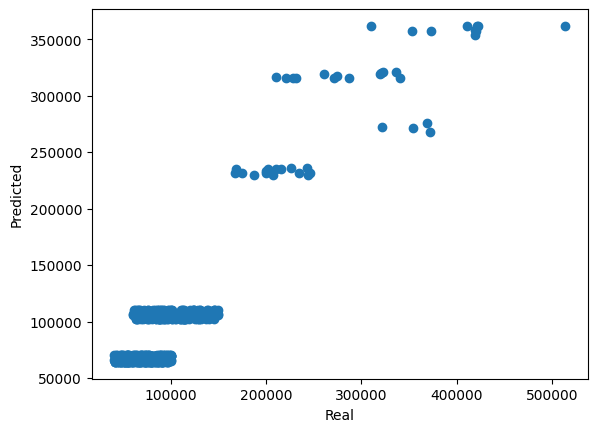

In [20]:
plt.scatter(y_train, y_predict)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()

In [21]:
r2_score(y_train, y_predict)

0.8382292690889315

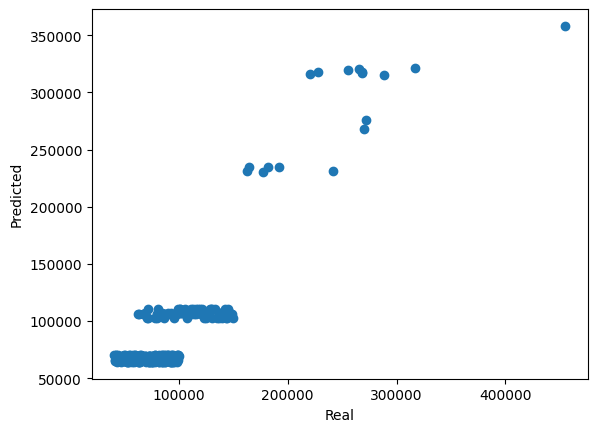

In [22]:
y_pred_test = model.predict(X_test)
plt.scatter(y_test, y_pred_test)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()

In [23]:
r2_score(y_test, y_pred_test)

0.7674579566170036

In [24]:
import pickle

# Specify the file path to save the pipeline
file_path = 'trained_model.pkl'

# Save the pipeline to disk
with open(file_path, 'wb') as file:
    pickle.dump(model, file)